## CHEM452 - Support Vector Machines

plot_svc_decision_function is nothing you need to worry about, other than that we are using it to visualize the decision boundaries and support vectors of our fitted models in what follows.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,linewidths=2,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=2, facecolors='none',edgecolor='k',linestyle='--');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


This is one of the only examples that will not explicitly use a chemical dataset because it is easier to demonstrate some of the intuition on a simple example dataset.  Here, we will use the make_circles function to make some random samples of two distinct datasets, and then separate them with a SVM classifier.

# Kernelized SVM

Here we will try to fit this circular data with a linear kernel using support vector machines. You will note that it cannot make this fit no matter how hard it tries because the decision boundary is non-linear!

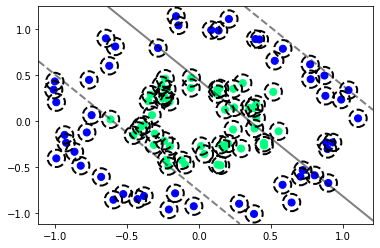

In [ ]:
from sklearn.datasets._samples_generator import make_circles
from sklearn.svm import SVC

X, y = make_circles(100, factor=.4, noise=.1) #Make concentric circles dataset

clf = SVC(kernel='linear',C=1e2).fit(X, y) #Fit a SVC with a linear kernel

#Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Now, we will upgrade our approach by employing a radial basis function kernel that can capture the intrinsic non-linearity of the decision boundary, providing a nice fit! You can also see the support vectors and their associated margins.

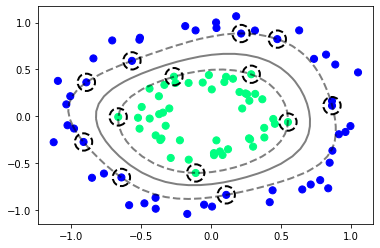

In [ ]:
clf = SVC(kernel='rbf', C=1E6) #Fit a SVC with a non-linear radial basis function kernel
clf.fit(X, y)
#Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

The most useful hyperparameter in support vector machines is the regularization constant 'C'. The strength of the regularization is inversely proportional to C, and Must be strictly positive. The penalty is a L2 penalty. C effectively describes how much of a margin it will allow on the support vectors.

Here, we will make the same SVC fit as above, but for different values of the regularization parameter C.

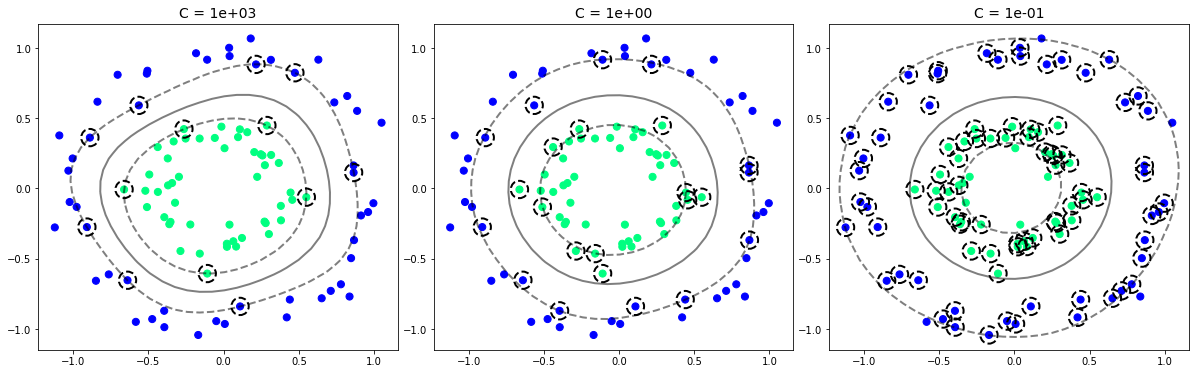

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(18, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

#Loop over multiple values of the regularization parameter C, fit, and plot model
for axi, C in zip(ax, [1e3, 1e0, 1e-1]):
    model = SVC(kernel='rbf', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.0e}'.format(C), size=14)